# Part One: Introduction & Classification with Scikit-learn

## Outline

**Main Goal:** Introduce the machine learning pipeline in scikit-learn

- Define Jupyter Notebooks
- Learn what machine learning is
- Represent data in `scikit-learn`
- Classify data with the `iris` data
- Modify and extend a classification pipeline to new models and data

## About Notebooks in Google Colab

This lesson is composed as a Jupyter Notebook. A Jupyter Notebook provides a computational environment in which to run, write, and edit code snippets alongside text and other content in Markdown format.

You have a number of options for how to run Jupyter Notebooks. For this workshop, we will use the cloud-based computational environment *Google Colaboratory* (or *Google Colab*). To execute code in a cell, select it,  then either press the play button to the left of the code or use the keyboard shortcut `Command/Ctrl+Enter`. To edit code, just click the cell and start editing.

## About Scikit-Learn

[`Scikit-Learn`](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code through a **clean, well-thought-out API**. Hundreds of contributors from around the world built it and it is used across industry and academia.

`Scikit-Learn` is built upon Python's [`NumPy` (Numerical Python)](http://numpy.org) and [`SciPy` (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. Other popular ML libraries in Python include [`TensorFlow`](https://www.tensorflow.org/) and [`PyTorch`](https://pytorch.org/).

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is a familiy of techniques that derive patterns from observed data and apply those patterns to previously unobserved data. 

Machine learning is a subfield of **Artificial Intelligence** in that algorithms are building blocks to make computers learn and behave more intelligently by (somehow) **generalizing** rather that just storing and retrieving data items like a database system would do.

In contrast to statistical methods that prioritize models and statistical inference, machine learning takes a **data-first** approach that prioritizes **prediction**. One common flow in working with machine learning is to 

1. Gather and observe a collection of data that is representative of the world
2. Abstract out patterns, rules, and association between a collection of observations (or "features") and a desired "target" variable, and 
3. Predict the target variable in previously unseen collection of data, given those features.

To get started, we'll focus on one subset of machine learning approaches: **classification**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

## Representation of Data in Scikit-learn

Machine learning is about creating models from data; therefore we'll start by
discussing how to represent data in a way the computer understands.  Along
with this, we'll create `matplotlib` examples to visualize the data.

Most machine learning algorithms implemented in `scikit-learn` expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **`n_samples`.**   The number of samples: Each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **`n_features`.**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

You should fix the number of features in advance. The number can be very high
(e.g., with millions of features in a "high dimensional" data set), perhaps even with most data points being zeros. 
`scipy.sparse` matrices can be useful if you have a lot of zeroes: They are
more memory-efficient than `numpy` arrays.

![Data Layout](https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/images/data-layout.png?raw=1)

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

## Example: the Iris Dataset

We're going to use the `iris` data bundled with `scikit-learn` (Anderson, 1936; Fisher, 1936). The data consists of measurements of the three different species of iris shown below.

In [3]:
from IPython.core.display import Image, display
Image(url="https://raw.githubusercontent.com/jakevdp/sklearn_tutorial/master/notebooks/images/iris_setosa.jpg")
# Iris Setosa

In [4]:
Image(url = 'http://raw.githubusercontent.com/jakevdp/sklearn_tutorial/master/notebooks/images/iris_versicolor.jpg')
# Iris Versicolor

In [5]:
Image(url='http://raw.githubusercontent.com/jakevdp/sklearn_tutorial/master/notebooks/images/iris_virginica.jpg')
# print("Iris Virginica")

### Quick Question:

**What kind of data does an algorithm to recognize iris species need?**

Recall that we need a 2D array of size `[n_samples x n_features]`.

- What are the `n_samples`?

- What are the `n_features`?

Each sample requires a **fixed** number of features, and feature
number ``i`` must be a similar kind of quantity for each sample.

### The `iris` Data

The `iris` data is straightforward, with these variables:

  - sepal length in cm
  - sepal width in cm
  - petal length in cm
  - petal width in cm

Target classes to predict are

  - *Iris Setosa*
  - *Iris Versicolour*
  - *Iris Virginica*
  
Use a `Scikit-learn` helper function to load the `iris` data into numpy arrays:

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [11]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [12]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

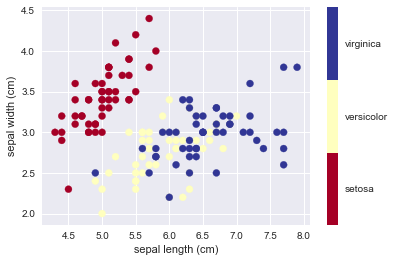

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separates the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Get started with classification

### Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. Here are some more complicated examples:

- given a multicolor image of an object, determine whether that object is a star, a quasar, or a galaxy
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

#### Classification Example
K Nearest Neighbors (kNN) is one of the simplest and most useful learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [15]:
# Example of training data with two classes, and a new unknown observation
Image(url="https://cdn-images-1.medium.com/max/800/0*uNbO79MrS7jvY4qp.png")

In [16]:
# K Nearest Neighbors with k = 3
Image(url='https://cdn-images-1.medium.com/max/800/0*QmLAPLYUDcpJYwvo.png')

Let's try it out on our iris classification problem:

In [17]:
from sklearn import neighbors, datasets

# load our data
iris = datasets.load_iris()

In [18]:
# create a features matrix and target array
X, y = iris.data, iris.target

In [19]:
# instatiate the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [20]:
# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:

sample_data = [[3, 5, 4, 2],]

result = knn.predict(sample_data)

In [22]:
# print the predicted label

print(iris.target_names[result])

['versicolor']


In some cases, predicting a label will not be sufficient. We may also wish to know the confidence the model places in that prediction - or in other words, associate a probability with the each possible target labels.

Many models in scikit-learn allow for the `.predict_proba()` method. Like `.predict()`, `.predict_proba()` accepts a set of observatrions as input. In this case, `.predict_proba()` also returns an array of probabilities assigned to each label. Let's try:

In [119]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

### 1. Your turn: predict a label!

In [24]:
# sample_data_2 = YOUR_DATA_HERE

In [25]:
# result_2 = ???

In [26]:
# print(iris.target_names[result_2])

### Recap: Scikit-learn's estimator interface

The `Scikit-learn` developers have tried to maintain a uniform user interface across all methods. We'll see examples of these below. Given a `scikit-learn` *estimator*
object named `model`, the following methods are available:

- Available in **all estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
    
- Available in **some estimators**
  + `model.predict_proba()`: return probabilities of class predictions, ordered by class label

## Model validation

An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *nearest neighbor classifier*. This is a very simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [32]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a *training set* and a *testing set*. `scikit-learn` contains some convenient routines to do this:

In [108]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [114]:
# Let's take a look
print(Xtrain.shape)
print(ytrain.shape)

print(Xtest.shape)
print(ytest.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [113]:
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[14  0  0]
 [ 0 12  0]
 [ 0  3  9]]


## Feature importance

So far, we have been working towards the goal of improving the performance of our classifer model. In a research context, we may actually be more interested in the **features** in the model than the task of **prediction** itself. That is, we want to identify features that are most predictive of our target oucome.

The performance of our estimator is still quite important; it gives us confidence we have learned a relationship between `X` and `y`. But we may also require more insight into the importance of features.

Let's take an example from medical research. 

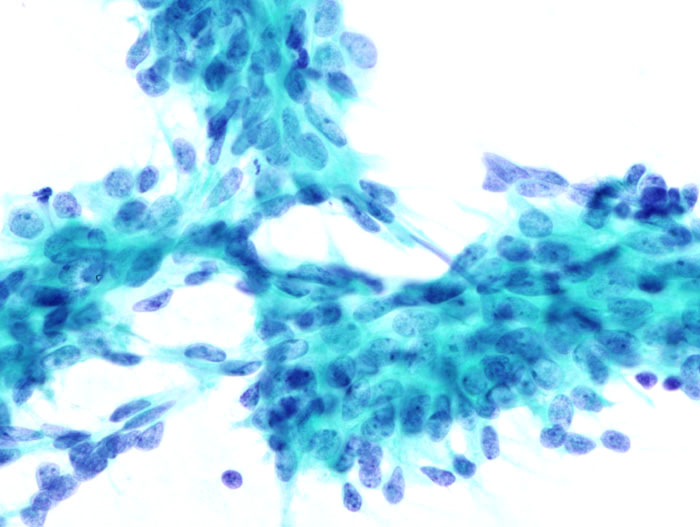

In [36]:
Image('https://upload.wikimedia.org/wikipedia/commons/8/8b/Breast_fibroadenoma_by_fine_needle_aspiration_%282%29_PAP_stain.jpg', width = 600)

Today, we'll be using the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset. More information [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

The original repository) contains several versions of the breast cancer data. For today we're interested in Dr. Wolberg's original encodings of the FNA image data, which uses a ranking of 1 to 10 to describe a variety of attributes such unifority of cell shape and size, mitoses and normal nuclei count, margin adhesion, clump thickness, and so on.

Let's say we start with the follwing research question:

> Can we predict with some accuracy the malignancy of a breast growth based on clinical observations of fine needle aspiration (FNA) images? If so, what specific observations or measurements are most predictive of malignancy?


**QUESTION: How would we approach this as a classification question?**

Let's import our data, train our classifier, and see how it performs.

In [128]:
wi_data = pd.read_csv('https://raw.githubusercontent.com/arcus/education-materials/master/intro-to-ml/wisconsin_data_clean.csv')
wi_data = wi_data.drop(wi_data.columns[0], axis=1)
wi_data = wi_data.dropna(how='any')

In [129]:
wi_data.head()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,is_benign,is_malignant
0,1000025,5,1,1,1,2,1.0,3,1,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,1,0


In [123]:
# note the convention of capital X for features matrix
# and lowercase y for target array
X_wi = wi_data.drop(columns=['sample_code', 'is_benign', 'is_malignant'])
y_wi = wi_data['is_malignant']

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Xtrain, Xtest, ytrain, ytest = train_test_split(X_wi, y_wi)

In [124]:
rf.fit(Xtrain, ytrain)

print(rf.score(Xtrain, ytrain))
print(rf.score(Xtest, ytest))

0.998046875
0.9298245614035088


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**QUESTION: Why are these two scores different?**

In [125]:
ypred = rf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[105   1]
 [ 11  54]]


In [126]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_wi.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                       importance
uniformity_cell_shape    0.353324
bland_chrom              0.300970
uniformity_cell_size     0.156329
clump_thickness          0.068393
bare_nuclei              0.034991
single_epi_cell_size     0.029085
norm_nuclei              0.027141
marginal_adhesion        0.023163
mitoses                  0.006606


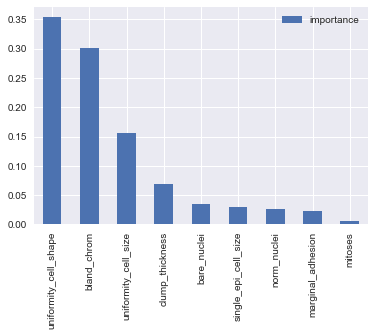

In [127]:
feature_importances.plot.bar()

## Your turn: 

### Option One: Run classification on the iris dataset using a Random Forest Classifier AND a test/train split

#### 0) Import your data (and take a look at shape + metadata, for your reference!)

In [ ]:
## load our data again

iris = datasets.load_iris()

## create feature matrix and target array based on the dataset
## where did you store the dataset after loading it?

# X, y = ??.data, ??.target

#### 1) Set train and test splits

In [ ]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(???, ???)

#### 2) Instantiate your model as an object (and, optionally, set any parameters)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


#### 3) Fit your model

In [ ]:
# rf.??(???, ???)

#### 4) Apply your model (make predictions)

In [ ]:
### new_sample = [[??, ??, ??, ??],]

#### 5) Validate on test data (and, for your reference, compare to performance on training data)

In [ ]:
## score on train
svm.score(X_train, y_train)

In [ ]:
## score on test

#### 6) Compare feature importances in your classifier

In [120]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_wi.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                       importance
uniformity_cell_shape    0.262114
uniformity_cell_size     0.251137
bland_chrom              0.155058
bare_nuclei              0.124661
single_epi_cell_size     0.075101
norm_nuclei              0.053415
clump_thickness          0.036100
marginal_adhesion        0.032860
mitoses                  0.009554


### Option Two: Try classification with a new dataset: blood donation

For this example, we are going to use a new datase from **openml** 

#### 0) Import your data (and take a look at shape + metadata, for your reference!)

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
blood = fetch_openml('blood-transfusion-service-center')

In [ ]:
print(blood.DESCR)

In [ ]:
X_train.shape

In [ ]:
pd.Series(y_train).value_counts()

#### 1) Set train and test splits

In [ ]:
## rewrite this to set train and test splits
## following naming conventions from elsewhere in code

In [ ]:
# X_train.shape
# y_train.shape
# X_test.shape
# y_test.shape

#### 2) Instantiate your model as an object (and, optionally, set any parameters)

In [ ]:
## MODEL OF YOUR CHOICE!
## One option: LinearSVC

# from sklearn.svm import LinearSVC

#### 3) Fit your model

#### 4) Apply your model (make predictions)

In [ ]:
## Your code here

#### 5) Validate on test data (and, for your reference, compare to performance on training data)

In [ ]:
## score on train

In [ ]:
## score on test

## Acknowledgments

Thank you first and foremost to my fantastic reviewers: Victor Ruiz, Sheila Braun, and Remo Williams.
    
These notebooks are based primarily on two sources:

1. [Jake Vanderplas' Scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial/) 
View [license](https://github.com/jakevdp/sklearn_tutorial/blob/master/LICENSE)
2. [Andreas Müller's Introduction to Machine learning with Python workshop](https://github.com/amueller/ml-workshop-1-of-4) 
View [license](https://github.com/amueller/ml-workshop-1-of-4/blob/master/LICENSE)

This notebook is a project of [Arcus Education](https://education.arcus.chop.edu/). The primary author is [Zoë Wilkinson Saldaña](https://github.com/zoews).